In [39]:
import json
import csv
import funciones

In [40]:
compuestos = {}
lista_distancias = []
incognita = {}

In [41]:
def parse_compound(dicc):
    """ Toma del diccionario dado por parametro el spectrum y el nobre del compuesto que representa devolviendo una tupla con ambos valores, el nombre como cadena y el spectrum como diccionario. """
    spectrum = {}
    espectro = dicc["spectrum"].split()
    for x in espectro:
        espectro_dividido = x.split(":")
        spectrum[float(espectro_dividido[0])] = float(espectro_dividido[1])
    nombre = dicc["compound"][0]["names"][0]["name"].upper()
    return (nombre, spectrum)

In [42]:
with open("MoNA-export-GC-MS_Spectra.json", encoding="utf-8") as mona:
    mona.readline()
    for line in mona:
        if len(line) < 4:
            continue
        dic = json.loads(line.rstrip("\n,"))
        nombre, spectrum = parse_compound(dic)
        compuestos[nombre] = compuestos.get(nombre, [])
        compuestos[nombre].append(spectrum)

In [43]:
for nombre, spectrum in compuestos.items():
    largo_spectrums = len(compuestos[nombre])
    compuestos[nombre] = funciones.combinar(compuestos[nombre])
    funciones.escalar_diccionario(compuestos[nombre], 1/largo_spectrums)

In [44]:
with open("muestra_grupo_15.csv") as csv_file:
    dato_csv = csv.reader(csv_file)
    for x, y in dato_csv:
        incognita[float(x)] = incognita.get(float(x), float(y))

In [45]:
for nombre, medicion in compuestos.items():
    distancia = funciones.calcular_distancia(incognita, compuestos[nombre], 2)
    lista_distancias.append((nombre, distancia))

In [46]:
lista_distancias.sort(key=lambda x:x[1])

In [47]:
from IPython.display import display, Markdown, Latex

In [48]:
menores_5_distancias = lista_distancias[:5]
mayores_5_distancias = lista_distancias[-5:]

markdown = ["## 5 MENORES DISTANCIAS \n\n|Compuesto | Distancia|\n |---|---| "]
for nombre_menor, distancia_menor in menores_5_distancias:
    markdown.append(f"|{nombre_menor} | {distancia_menor}|")
    
display(Markdown("\n".join(markdown) + "\n"))

display(Markdown("## 5 MAYORES DISTANCIAS"))
cadena = "| Compuesto | Distancia | \n | --- | --- | \n"
for nombre_mayor, distancia_mayor in mayores_5_distancias:
    cadena += f" {nombre_mayor} | {distancia_mayor} \n"
display(Markdown(cadena))

## 5 MENORES DISTANCIAS 

|Compuesto | Distancia|
 |---|---| 
|DIBUTYL 2-(N-TRIFLUOROACETYLAMINO)ETHYLPHOSPHONATE | 1853.3294822779758|
|1,6-DIMETHYL-4-OXO-7,8-DIHYDRO-1H,4H,6H-PYRIDO(1,2-A)PYRIMIDINE-3-CARBOXYLIC ACID | 9170.917014417973|
|ACETAMINOPHEN | 9721.349954931791|
|N-PHENYLPROPADIENYL-3-PHENOLAMINE | 10227.947440230573|
|(E)-TERT-BUTYL 3-BENZYLAMINO-5-PHENYL-4-PENTENOATE | 10393.12838661797|


## 5 MAYORES DISTANCIAS

| Compuesto | Distancia | 
 | --- | --- | 
 6,7,8,9,10,10-HEXACHLORO-1,5,5A,6,9,9A-HEXAHYDRO-6,9-METHANO-2,4,3-BENZODIOXATHIEPIN3-OXIDE | 136400.72177881803 
 5ALPHA-CHOLEST-3-ENE | 142241.7042634112 
 2,2',3,3',4,4',6,6'-OCTA-ORTHO-METHYL-TREHALOSE | 154813.82688963728 
 D-LIMONENE 1,2-EPOXIDE | 154947.20496390722 
 2,2',3,3',4,4',6,6'-OCTA-ORTHO-[D3]METHYL-TREHALOSE-D24 | 195157.22439462593 


In [49]:
import numpy as np

In [50]:
import matplotlib.pyplot as plt

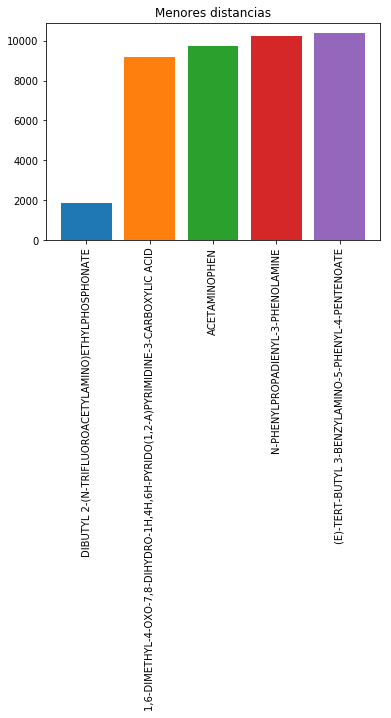

In [52]:
for names, dist_menor in menores_5_distancias:
    b1 = plt.bar(names, dist_menor)
    plt.title("Menores distancias")
    plt.xticks(rotation='vertical')

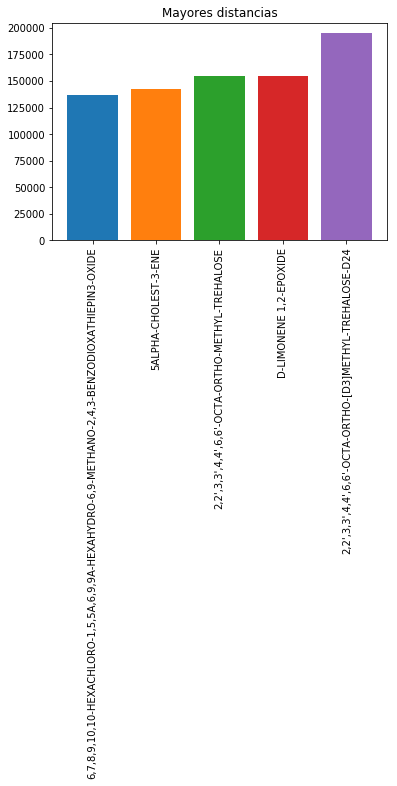

In [53]:
for nombres, dist_mayor in mayores_5_distancias:
    b2 = plt.bar(nombres, dist_mayor)
    plt.title("Mayores distancias")
    plt.xticks(rotation="vertical")

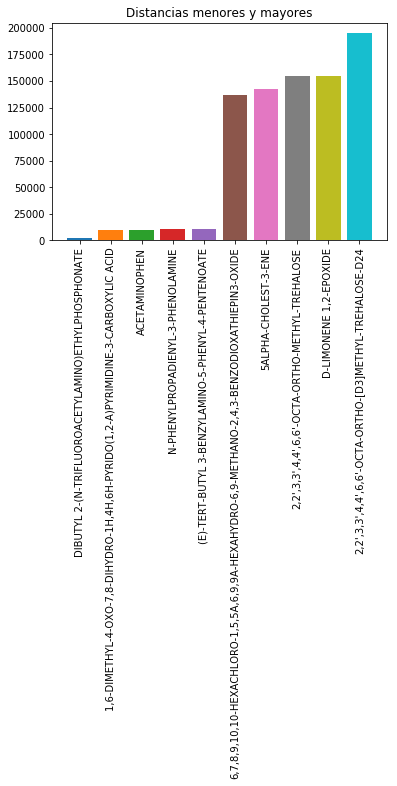

In [51]:
for names, dist_menor in menores_5_distancias:
        plt.bar(names, dist_menor)
for nombres, dist_mayor in mayores_5_distancias:
        plt.bar(nombres, dist_mayor)
plt.title("Distancias menores y mayores")
plt.xticks(rotation='vertical')
plt.show()

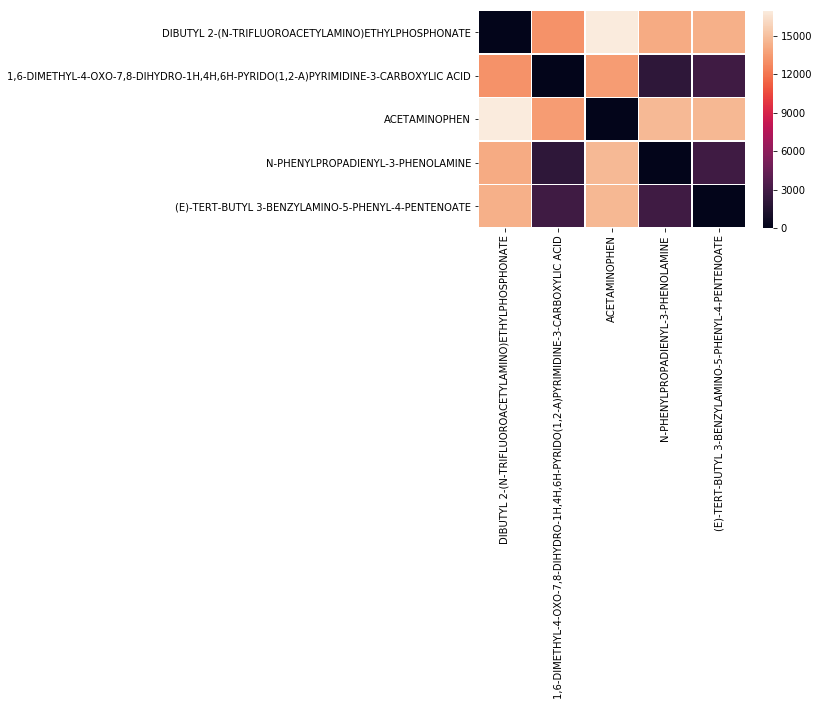

In [54]:
import seaborn as sns
lista1 = []
lista_nombres_menores = []
for nombres_menores, distancias_menores in menores_5_distancias:
    lista1.append((nombres_menores, compuestos[nombres_menores]))
    lista_nombres_menores.append(nombres_menores)
distancias_con_0 = [funciones.calcular_distancia(lista1[0][1], lista1[0][1], 2), funciones.calcular_distancia(lista1[0][1], lista1[1][1], 2), funciones.calcular_distancia(lista1[0][1], lista1[2][1], 2), funciones.calcular_distancia(lista1[0][1], lista1[3][1], 2), funciones.calcular_distancia(lista1[0][1], lista1[4][1], 2)]
distancias_con_1 = [funciones.calcular_distancia(lista1[0][1], lista1[1][1], 2), funciones.calcular_distancia(lista1[1][1], lista1[1][1], 2), funciones.calcular_distancia(lista1[1][1], lista1[2][1], 2), funciones.calcular_distancia(lista1[1][1], lista1[3][1], 2), funciones.calcular_distancia(lista1[1][1], lista1[4][1], 2)]
distancias_con_2 = [funciones.calcular_distancia(lista1[0][1], lista1[2][1], 2), funciones.calcular_distancia(lista1[2][1], lista1[1][1], 2), funciones.calcular_distancia(lista1[2][1], lista1[2][1], 2), funciones.calcular_distancia(lista1[2][1], lista1[3][1], 2), funciones.calcular_distancia(lista1[2][1], lista1[4][1], 2)]
distancias_con_3 = [funciones.calcular_distancia(lista1[0][1], lista1[3][1], 2), funciones.calcular_distancia(lista1[3][1], lista1[1][1], 2), funciones.calcular_distancia(lista1[3][1], lista1[2][1], 2), funciones.calcular_distancia(lista1[3][1], lista1[3][1], 2), funciones.calcular_distancia(lista1[3][1], lista1[4][1], 2)]
distancias_con_4 = [funciones.calcular_distancia(lista1[0][1], lista1[4][1], 2), funciones.calcular_distancia(lista1[4][1], lista1[1][1], 2), funciones.calcular_distancia(lista1[4][1], lista1[2][1], 2), funciones.calcular_distancia(lista1[4][1], lista1[3][1], 2), funciones.calcular_distancia(lista1[4][1], lista1[4][1], 2)]
matriz = [distancias_con_0, distancias_con_1, distancias_con_2, distancias_con_3, distancias_con_4]
ax = sns.heatmap(matriz, linewidth=0.5, xticklabels=lista_nombres_menores, yticklabels=lista_nombres_menores)

In [109]:
compuesto1=("incognita", incognita)

def graficar(compuesto1, compuesto2):
    eje_x =[]
    eje_y=[]

    for clave, valor in incognita.items():
        eje_x.append(clave)
        eje_y.append(valor)

    eje_x = np.array(eje_x)
    eje_y = np.array(eje_y)

    a1 = np.zeros((5000))
    eje_y = np.concatenate((a1, eje_y), axis=0)

    clave1 = max(eje_x)
    b = np.linspace(0, clave1*1.1, 5000)
    eje_x = np.concatenate((b, eje_x), axis=0)

    a = eje_x.argsort()
    eje_x = eje_x[a]
    eje_y = eje_y[a]

    iones = []
    mediciones = []
    nombre, diccionario = compuesto2
    for ion, medicion in diccionario.items():
            mediciones.append(medicion)
            iones.append(ion)

    ion_max = max(iones)
    y1 = np.linspace(0, ion_max * 1.1, 5000)
    eje_y1 = np.concatenate((y1, mediciones), axis=0)

    x1 = np.zeros(5000)
    eje_x1 = np.concatenate((x1, iones), axis=0)

    orden = eje_x1.argsort()

    eje_x1 = eje_x1[orden]
    eje_y1 = eje_y1[orden]
    import plotly.offline as py
    import plotly.graph_objs as go

    py.init_notebook_mode(connected=True)

    trace1 = go.Scatter(
                x = eje_x,
                y = eje_y,
                mode = 'lines',
                name = 'Compuesto incógnita'
    )

    trace2 = go.Scatter(
                x = eje_x1,
                y = [ -y1 for y1 in eje_y1],
                mode = 'lines',
                name = f"{nombre}"
    )

    py.iplot([trace1, trace2])

In [110]:
graficar(compuesto1, lista1[0])
graficar(compuesto1, lista1[1])
graficar(compuesto1, lista1[2])
graficar(compuesto1, lista1[3])
graficar(compuesto1, lista1[4])

## Conclusión

Según lo determinado entre las mediciones del espectómetro y la base de datos MoNA con las funciones ( y luego cotejado con sus respectivos gráficos), queda en claro que el compuesto incógnita puede ser ***DIBUTIL 2-(N-TRIFLUORACETIL AMINO)ETILFOSFONATO***. Ya que la diferencia de mediciones entre este y nuestro compuesto se asemejan bastante, en comparación con los otros 4 compuestos más cercano. También se tiene en cuenta que, de los cinco compuestos más similares, ninguno comparte especie química, por lo que se puede asumir que la incógnita es más compatible con aquel compuesto con menor distancia a ella.